# **Machine Learning and Statistics (Weekly Test- 19-07-2024)- Haritha P V**

# Dataset

Evaluating with the help of diabeties data set

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/sample_data/diabetes.csv")

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# 1.Implement Multiple Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
# Features and target variable
X=df.drop(columns=['Outcome'])# all columns except outcome column
y=df['Outcome']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression model
lr=LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predictions
y_pred = lr.predict(X_test)

In [ ]:
# Metrics
# Mean Squared Error
mse=mean_squared_error(y_test, y_pred)
# Root Mean Squared Error
rmse=np.sqrt(mse)
# R-squared
r2=r2_score(y_test, y_pred)
# Mean Absolute Error
mae=mean_absolute_error(y_test, y_pred)

In [ ]:
print("Mean Squared Error (MSE): {:.4f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse))
print("Mean Absolute Error (MAE): {:.4f}".format(mae))
print("R-squared (R²): {:.4f}".format(r2))

Mean Squared Error (MSE): 0.1710
Root Mean Squared Error (RMSE): 0.4136
Mean Absolute Error (MAE): 0.3481
R-squared (R²): 0.2550


The model has an R-squared of 0.2550, indicating it explains about 25.50% of the target variable's variance. The MSE, RMSE, and MAE values suggest that the predictions have a moderate error, with RMSE of 0.4136 reflecting average prediction deviations.

In [ ]:
# Create a DataFrame to display actual values, predicted values, and differences
results_df = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred,
    'Difference (Actual - Predicted)': y_test - y_pred
})

# Print the DataFrame
print(results_df)

     Actual Values  Predicted Values  Difference (Actual - Predicted)
668              0          0.335500                        -0.335500
324              0          0.238099                        -0.238099
624              0          0.151052                        -0.151052
690              0          0.240136                        -0.240136
473              0          0.481424                        -0.481424
..             ...               ...                              ...
355              1          0.681590                         0.318410
534              0          0.163167                        -0.163167
344              0          0.481562                        -0.481562
296              1          0.301017                         0.698983
462              0          0.261109                        -0.261109

[154 rows x 3 columns]


For 0,The predicted values are positive, and the differences are negative, indicating that the model is predicting a higher value than the actual value.

For 1,The predicted values are less than 1, and the differences are positive, indicating that the model is predicting a lower value than the actual value.

# 2. Implement Decision Tree with Hyperparameter Tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Decision Tree model
dt=DecisionTreeClassifier()

In [ ]:
# Hyperparameter tuning
param_grid={
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

In [ ]:
grid_search=GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
best_dt=grid_search.best_estimator_
y_pred_dt=best_dt.predict(X_test)

In [ ]:
# Metrics
accuracy_dt=best_dt.score(X_test, y_test)

accuracy_dt

0.7597402597402597

A model accuracy of 75% means it correctly predicted the outcome 75% of the time.

# 3. Implement Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [ ]:
# Naive Bayes model
nb=GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predictions
y_pred_nb=nb.predict(X_test)


In [ ]:
# Metrics
accuracy_nb=accuracy_score(y_test, y_pred_nb)

accuracy_nb

0.7662337662337663

In [ ]:
# Convert y_pred to binary values (assuming a threshold of 0.5)
y_pred_binary=(y_pred > 0.5).astype(int)

# Calculating confusion matrix and F1 score using the binary predictions
conf_matrix=confusion_matrix(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Displaying the results
print("Confusion Matrix:")
print(conf_matrix)

print("\nF1 Score:")
print(f1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

Confusion Matrix:
[[80 19]
 [18 37]]

F1 Score:
0.6666666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154





Class 0 has higher precision, recall, and F1-score compared to Class 1, indicating better performance.
Class 1 has lower precision and recall, which suggests the model might struggle more with this class.
Accuracy is decent at 76%, but the macro and weighted averages show that the performance is slightly better for class 0 compared to class 1.

# 4. Implement Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
# SVM model
svm=SVC()
svm.fit(X_train, y_train)


SVC()

In [ ]:
# Predictions
y_pred_svm=svm.predict(X_test)


In [ ]:
# Metrics
report_svm=classification_report(y_test, y_pred_svm)

print(report_svm)

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



Class 0 has higher precision and recall compared to Class 1, indicating the model performs better at identifying instances of Class 0.

The overall accuracy of the model is 0.77, meaning it correctly predicted the class 77% of the time.

# 6. Handling Missing Values


In [ ]:
# Creating a DataFrame with missing values
data_with_missing = df.copy()
data_with_missing['Insulin'] = data_with_missing['Insulin'].apply(lambda x: np.nan if x < 50 else x)

df_with_missing=pd.DataFrame(data_with_missing)

# Displaying the DataFrame with missing values
df_with_missing.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,NaN,33.6,0.627,50,1
1,1,85,66,29,NaN,26.6,0.351,31,0
2,8,183,64,0,NaN,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [ ]:
# Display the number of missing values in each column before handling
missing_values_before=df_with_missing.isnull().sum()
print("Missing values before handling:")
print(missing_values_before)


Missing values before handling:
Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     411
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
# Handling missing values by filling with mean
df_filled=df_with_missing.fillna(df_with_missing.mean())

# Displaying the filled DataFrame
df_filled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,167.851541,33.6,0.627,50,1
1,1,85,66,29,167.851541,26.6,0.351,31,0
2,8,183,64,0,167.851541,23.3,0.672,32,1
3,1,89,66,23,94.000000,28.1,0.167,21,0
4,0,137,40,35,168.000000,43.1,2.288,33,1


# 7. Plotting Visualizations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

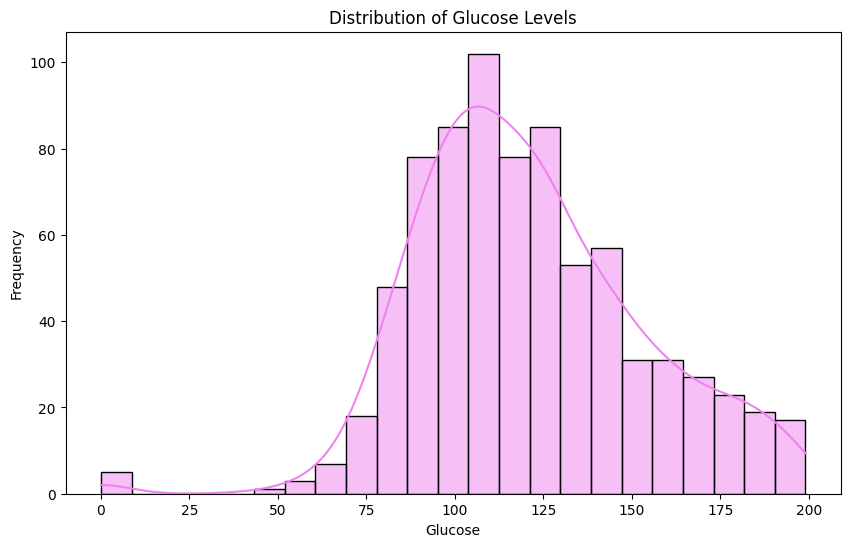

In [ ]:
# Histogram of Glucose levels
plt.figure(figsize=(10, 6))
sns.histplot(df['Glucose'], kde=True, color='violet')
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

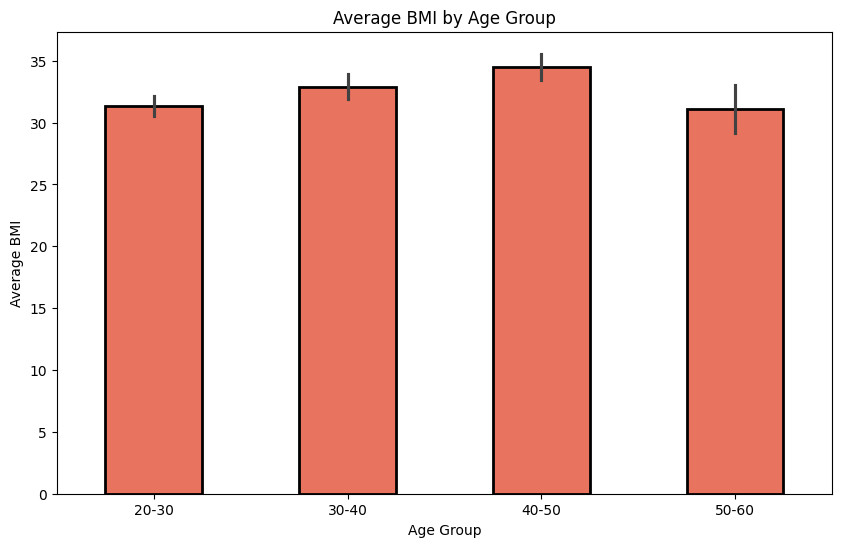

In [ ]:
# Creating age groups
df_filled['AgeGroup']=pd.cut(df_filled['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])

# Bar chart of average BMI by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='BMI', data=df_filled, color='tomato', linewidth=2, edgecolor='black',width=0.5)
plt.title('Average BMI by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average BMI')
plt.show()

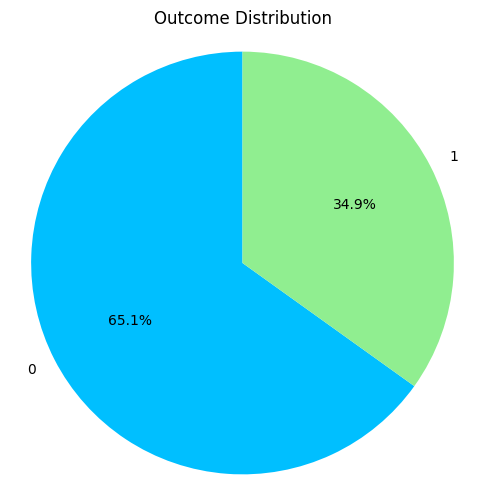

In [ ]:
# Pie chart of Outcome distribution
outcome_counts=df_filled['Outcome'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90, colors=['deepskyblue','lightgreen'])
plt.title('Outcome Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()